# Cleanup of Star Wars

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json

## Loading Data

### Episode 1, Episode 2 and 3


In [3]:
pkl_episodes = [{'filename': 'episode_01.pkl', 'name': 'The Phantom Menace'}, 
            {'filename': 'episode_02.pkl', 'name':'Attack of the Clones'},
                {'filename': 'episode_03.pkl', 'name':'The Revenge of the Sith'},
               ]

for episode in pkl_episodes:
    filename = f'./data/{episode["filename"]}'
    episode['df'] = pd.read_pickle(filename)
    episode['df'].drop(["Paragraph"],axis=1,inplace=True)
    episode['df'].rename(columns={'Character': 'character', 'Dialogue': 'dialogue'}, inplace=True)
    episode['df']['episode'] = episode['name']

In [4]:
pkl_episodes[0]['df'].head()

,character,dialogue,episode
0,TITLE CARD,"A long time ago in a galaxy far, far away....",The Phantom Menace
1,QUI-GON,(off screen voice) Captain.,The Phantom Menace
2,CAPTAIN,"Yes, sir?",The Phantom Menace
3,CAPTAIN,(cont'd) With all due respect for the Trade Fe...,The Phantom Menace
4,PK-4,They must be important if the Viceroy sent one...,The Phantom Menace


In [5]:
pkl_episodes[1]['df'].head()

,character,dialogue,episode
6,CAPTAIN TYPHO,"We made it. I guess I was wrong, there was no ...",Attack of the Clones
7,PADME,CordE...,Attack of the Clones
8,CORDE,"... I'm sorry, m'lady... I'm... not sure I...",Attack of the Clones
9,AMIDALA,No!... No!... No!...,Attack of the Clones
10,AMIDALA,I should not have come back.,Attack of the Clones


In [6]:
pkl_episodes[2]['df'].head()

,character,dialogue,episode
1,ANAKIN,"There isn't a droid made that can out fly you,...",The Revenge of the Sith
2,OBI-WAN,"Look out, four droids inbound . . .",The Revenge of the Sith
3,OBI-WAN,We've got to split them up.,The Revenge of the Sith
4,ANAKIN,"Break left, fly through the guns on that tower.",The Revenge of the Sith
5,OBI-WAN,Easy for you to say . . . why am I always the ...,The Revenge of the Sith


### Episode 4, 5 and 6

In [7]:
csv_episodes = [{'filename': '04_star_wars.txt', 'name': 'A New Hope'}, 
            {'filename': '05_star_wars.txt', 'name':'The Empire Strikes Back'},
            {'filename': '06_star_wars.txt', 'name':'The Return of the Jedi'},]

for episode in csv_episodes:
    filename = f'./data/{episode["filename"]}'
    episode['df'] = pd.read_csv(filename, delim_whitespace=True,
                      names=["index","character","dialogue"], 
                      header = None)
    episode['df'].drop(0,inplace=True)
    episode['df'].drop(["index"],axis=1,inplace=True)
    episode['df']['episode'] = episode['name']


In [8]:
#print(f'{csv_episodes[0]["df"].iloc([0], [0])}')
print(f"Shape: {csv_episodes[0]['df'].shape}")
csv_episodes[0]['df'].head()

Shape: (1010, 3)


,character,dialogue,episode
1,THREEPIO,Did you hear that? They've shut down the main...,A New Hope
2,THREEPIO,We're doomed!,A New Hope
3,THREEPIO,There'll be no escape for the Princess this time.,A New Hope
4,THREEPIO,What's that?,A New Hope
5,THREEPIO,I should have known better than to trust the l...,A New Hope


In [9]:
print(f"Shape: {csv_episodes[1]['df'].shape}")
csv_episodes[1]['df'].head()

Shape: (839, 3)


,character,dialogue,episode
1,LUKE,"Echo Three to Echo Seven. Han, old buddy, do y...",The Empire Strikes Back
2,HAN,"Loud and clear, kid. What's up?",The Empire Strikes Back
3,LUKE,"Well, I finished my circle. I don't pick up an...",The Empire Strikes Back
4,HAN,There isn't enough life on this ice cube to fi...,The Empire Strikes Back
5,LUKE,Right. I'll see you shortly. There's a meteori...,The Empire Strikes Back


In [10]:
print(f"Shape: {csv_episodes[2]['df'].shape}")
csv_episodes[2]['df'].head()

Shape: (674, 3)


,character,dialogue,episode
1,SHUTTLE CAPTAIN,"Command station, this is ST 321. Code Clearanc...",The Return of the Jedi
2,DEATH STAR CONTROLLER,The security deflector shield will be deactiva...,The Return of the Jedi
3,SHUTTLE CAPTAIN,We're starting our approach.,The Return of the Jedi
4,OFFICER,Inform the commander that Lord Vader's shuttle...,The Return of the Jedi
5,OPERATOR,"Yes, sir.",The Return of the Jedi


## Joining dataframes

In [11]:
episode_list = [csv_episodes[0]['df'], csv_episodes[1]['df'], csv_episodes[2]['df'],
               pkl_episodes[0]['df'], pkl_episodes[1]['df'],  pkl_episodes[2]['df']]
df = pd.concat(episode_list)

print(f'{df.shape}')

(4986, 3)


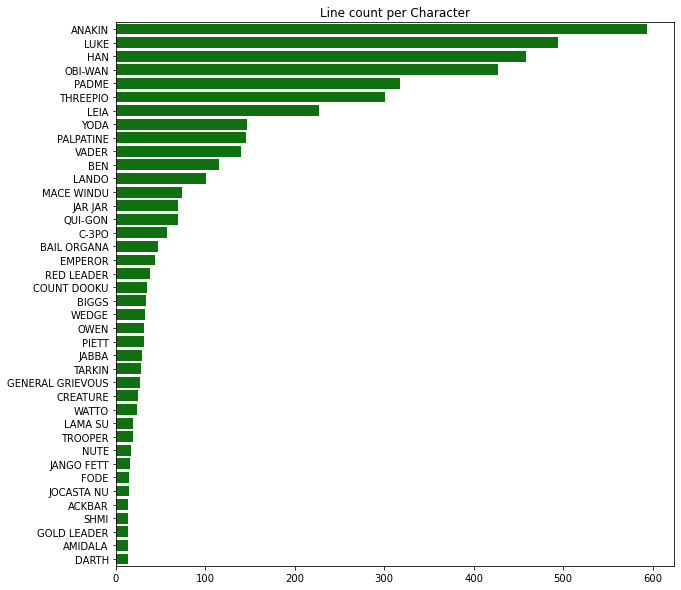

In [12]:
character_series = df['character'].value_counts()[:40,]
plt.figure(figsize=(10, 10))
ax = sns.barplot(x=character_series.values, y=character_series.index, color='green')

ax.set_title('Line count per Character')
plt.show()

In [14]:
filename = './data/star_wars_dialogue.pkl'
df.to_pickle(filename)